In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_curve, auc #roc_auc_score as AUC

train_raw = pd.read_csv('dataset/train.csv')
test_raw = pd.read_csv('dataset/test.csv')
validation_raw = pd.read_csv('dataset/validation.csv')

In [11]:
def get_avg_ctr(data_list):
    data_list = data_list.sample(frac=1)
    average_CTR = (data_list.click.value_counts().tolist()[1] * 100) / float(data_list.shape[0])
    return average_CTR


In [16]:
def load_pickle(file_path, max_bytes = 2**31 - 1):
    bytes_in = bytearray(0)
    input_size = os.path.getsize(file_path)
    with open(file_path, 'rb') as f_in:
        for _ in range(0, input_size, max_bytes):
            bytes_in += f_in.read(max_bytes)
    
    return pickle.loads(bytes_in)

train_raw = load_pickle('train_df_after_preprocessing.pkl')
test_raw = load_pickle('test_df_after_preprocessing.pkl')
valid_raw = load_pickle('valid_df_after_preprocessing.pkl')

In [17]:
y_train = train_raw['click'].values
y_train = y_train.reshape(len(y_train), 1)
x_train = train_raw.drop('click', axis = 1).values

y_valid = valid_raw['click'].values
y_valid = y_valid.reshape(len(y_valid), 1)
x_valid = valid_raw.drop('click', axis = 1).values

In [ ]:
def get_predict_CTR(X, Y): 
    model = LogisticRegression(C=1000.0, random_state=0)
#     model = GaussianNB()
    model.fit(X, Y)
    return model

In [19]:
def roc_results_plot(y_true, y_pred_prob):
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.05])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    
    plt.show()
    print('AUC: %f' % roc_auc)


In [95]:
def evaluate_linear_bidding(data_list, x_valid, y_valid, bid_price, budget, model):
    base_bid = float(bid_price)
    #avg_CTR = get_avg_ctr(train_raw)
    avg_CTR = 0.0737562325662
    
    predict_CTR_list = model.predict(x_valid)
    
    total_click = 0
    total_impression = 0

    data_list['predict_CTR'] = predict_CTR_list
    for pay_price, click, predict_CTR in data_list[['payprice', 'click', 'predict_CTR']].values:
        if(budget > 0):
            bid_price = base_bid * predict_CTR / avg_CTR
            if(budget - pay_price >=0 and int(bid_price) >= pay_price):
                total_click += click
                total_impression += 1
                budget -= pay_price
        else:
            break

    if(total_impression == 0):
        CTR = 0
    else:
        CTR = (total_click/ total_impression) * 100
    
    return [CTR, bid_price]

In [ ]:
def plot_bid():
    budget = 6250
    base_bid = [n for n in range(1, 30)]
    CTR_list = []

    model = get_predict_CTR(x_train, y_train)
    predict_CTR_list = model.predict(x_valid)
    roc_results_plot(predict_CTR_list, y_valid)

    for i in base_bid:
        tmp = evaluate_linear_bidding(validation_raw, x_valid, y_valid, i, budget, model)
        CTR_list.append(tmp[0])
    print(CTR_list)
    plt.plot(base_bid, CTR_list)
    plt.xlabel('base_bid')
    plt.ylabel('CTR')

In [91]:
model = get_predict_CTR(x_train, y_train)
# predict_CTR_list = model.predict(x_valid)
# print(predict_CTR_list)
# print(sum(predict_CTR_list))
evaluate_linear_bidding(validation_raw, x_valid, y_valid, 20, 6250, model)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


20
win:
271.1635248187192
win:
271.1635248187192
win:
271.1635248187192
win:
271.1635248187192
win:
271.1635248187192
win:
271.1635248187192
win:
271.1635248187192
win:
271.1635248187192
win:
271.1635248187192
win:
271.1635248187192
win:
271.1635248187192
win:
271.1635248187192
win:
271.1635248187192
win:
271.1635248187192
win:
271.1635248187192
win:
271.1635248187192
win:
271.1635248187192
win:
271.1635248187192
win:
271.1635248187192
win:
271.1635248187192
win:
271.1635248187192
win:
271.1635248187192
win:
271.1635248187192
win:
271.1635248187192
win:
271.1635248187192
win:
271.1635248187192
win:
271.1635248187192
win:
271.1635248187192
win:
271.1635248187192
win:
271.1635248187192
win:
271.1635248187192
win:
271.1635248187192
win:
271.1635248187192
win:
271.1635248187192
win:
271.1635248187192
win:
271.1635248187192
win:
271.1635248187192
win:
271.1635248187192
win:
271.1635248187192
win:
271.1635248187192
win:
271.1635248187192
win:
271.1635248187192
win:
271.1635248187192
win:
271

[1.4492753623188406, 271.1635248187192]

into


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


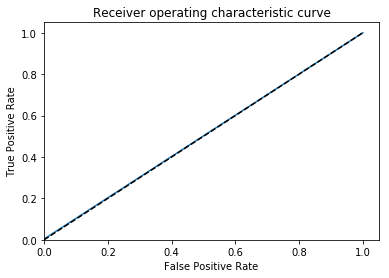

AUC: 0.501872
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
[0.11037527593818984, 0.17857142857142858, 0.7425742574257426, 1.5151515151515151, 1.3745704467353952, 1.1363636363636365, 1.8181818181818181, 2.0689655172413794, 1.3888888888888888, 1.4150943396226416, 1.6260162601626018, 1.0, 1.015228426395939, 1.1049723756906076, 2.272727272727273, 1.183431952662722, 0.628930817610063, 1.3157894736842104, 1.4492753623188406, 1.4492753623188406, 1.5384615384615385, 1.5384615384615385, 1.5384615384615385, 1.5384615384615385, 1.5384615384615385, 1.5384615384615385, 1.5384615384615385, 1.5384615384615385, 1.5384615384615385]


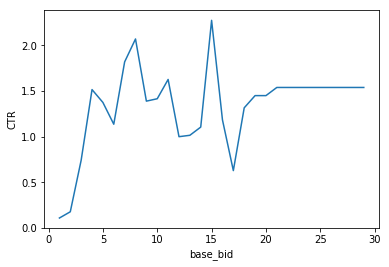

In [96]:
plot_bid()